In [5]:

import pandas as pd
import sklearn as sk
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
#import autosklearn.regression
import time

In [20]:
df = pd.read_hdf('../database/merged_v3_datetime_selected_10min.hd5','table')
df = df.dropna()

database_path = '../database/'



In [7]:
df['Speed 1 (rpm)'].describe()

count    9574.000000
mean       73.313767
std        10.537952
min         0.000000
25%        72.000000
50%        74.400000
75%        77.000000
max        83.700000
Name: Speed 1 (rpm), dtype: float64

In [8]:
l1_ = len(df)
df = df[df['Speed 1 (rpm)'] > 50] # Filter out all points below 50 rpm.
l2_ = len(df)
print('Number of datapoints filtered out: ', l1_-l2_, ' relative, ', (l1_-l2_)/l1_)

Number of datapoints filtered out:  199  relative,  0.020785460622519323


In [9]:
features_all = list(df)
for i in range(len(features_all)):
    print(i,features_all[i])

0 Aux Power1 (kW)
1 Consump1 Rate (kg/h)
2 Consump2 Rate  (kg/h)
3 Eng1 Tot1 Mass (kg)
4 Eng1 Tot2 Mass (kg)
5 Eng2 Tot1 Mass (kg)
6 Eng2 Tot2 Mass (kg)
7 Gps Speed (kn)
8 Power1 (kW)
9 Speed 1 (rpm)
10 SpeedlogSpeed (kn)
11 Torque 1 (kNm)


In [65]:
label = features_all[1] # Consumpt 1 is for the ME

test_features = [features_all[7],
                 features_all[8],
                 features_all[9],
                 features_all[10],
                 features_all[11]] # Using Torque, Speed rpm, Ship speed (log)


print('Test features: ', test_features)




Test features:  ['Gps Speed (kn)', 'Power1 (kW)', 'Speed 1 (rpm)', 'SpeedlogSpeed (kn)', 'Torque 1 (kNm)']


In [11]:
# Create new dataframe for training

df_train = pd.DataFrame()
for n_ in test_features:
    df_train[n_] = df[n_]


In [12]:
X = np.array(df_train)
y = np.array(df[label])

# Make a train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)


In [13]:
cores = -1 # use all cores

m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_linear.predict(X_test),y_test)
print('Linear R2 train:', R2_train)

m_svr = sk.svm.LinearSVR()
m_svr.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_svr.predict(X_test),y_test)
print('R2 train SVR:', R2_train)


Linear R2 train: 0.8580324416495558
R2 train SVR: 0.7540459121802051


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
from sklearn.ensemble import RandomForestRegressor
randfor_regr = RandomForestRegressor(max_depth=40, random_state=42,n_estimators=200)

randfor_regr.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(randfor_regr.predict(X_test),y_test)
print('R2 train random forest:', R2_train)


/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


R2 train random forest: 0.9371473953080334


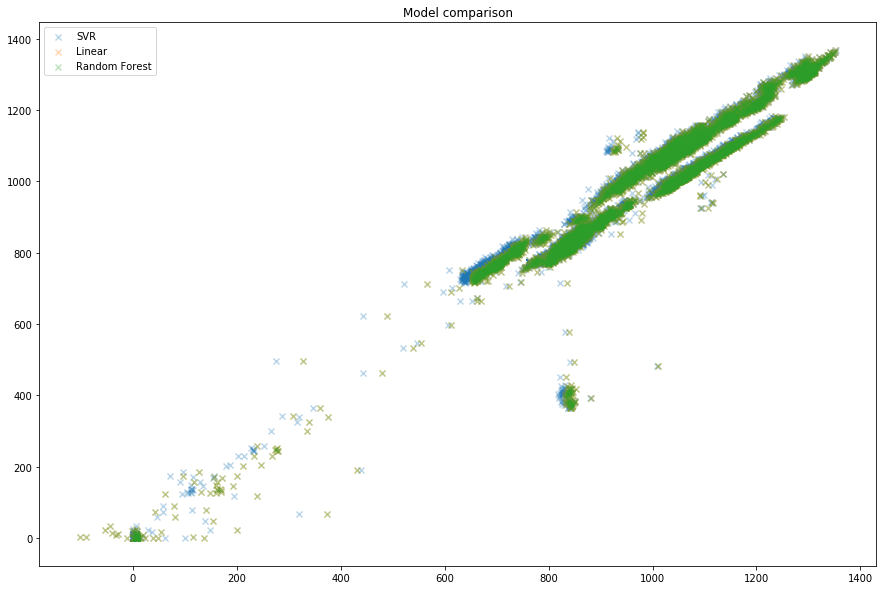

In [41]:
width = 15
height = 10
alpha_ = 0.3

fig, ax = plt.subplots()
fig.set_size_inches(width, height)

plt.scatter(m_svr.predict(X),y,alpha=alpha_,marker='x',label='SVR')
plt.scatter(m_linear.predict(X),y,alpha=alpha_,marker='x',label='Linear')
plt.scatter(m_linear.predict(X),y,alpha=alpha_,marker='x',label='Random Forest')

plt.title('Model comparison')
#ax.grid()
#ax.set(xlabel='Time', ylabel='FO Flow $m^3/h$')

plt.legend(loc='upper left')

plt.show()


In [44]:
## Some tests with the derivatives = 0

df_der = pd.read_hdf(database_path + 'merged_v3_datetime_selected_dspeed_dt0.hd5','table')


In [47]:

df_train = pd.DataFrame()

for n_ in test_features:
    df_train[n_] = df_der[n_]

X = np.array(df_train)
y = np.array(df_der[label])

# Make a train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)



In [48]:
cores = -1 # use all cores

m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_linear.predict(X_test),y_test)
print('Linear R2 train:', R2_train)

m_svr = sk.svm.LinearSVR()
m_svr.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(m_svr.predict(X_test),y_test)
print('R2 train SVR:', R2_train)

from sklearn.ensemble import RandomForestRegressor
randfor_regr = RandomForestRegressor(max_depth=40, random_state=42,n_estimators=200)

randfor_regr.fit(X_train, y_train.reshape(-1,))

R2_train = r2_score(randfor_regr.predict(X_test),y_test)
print('R2 train random forest:', R2_train)


Linear R2 train: 0.9316659032610611


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


R2 train SVR: 0.9230417244366923
R2 train random forest: 0.9686447263908542


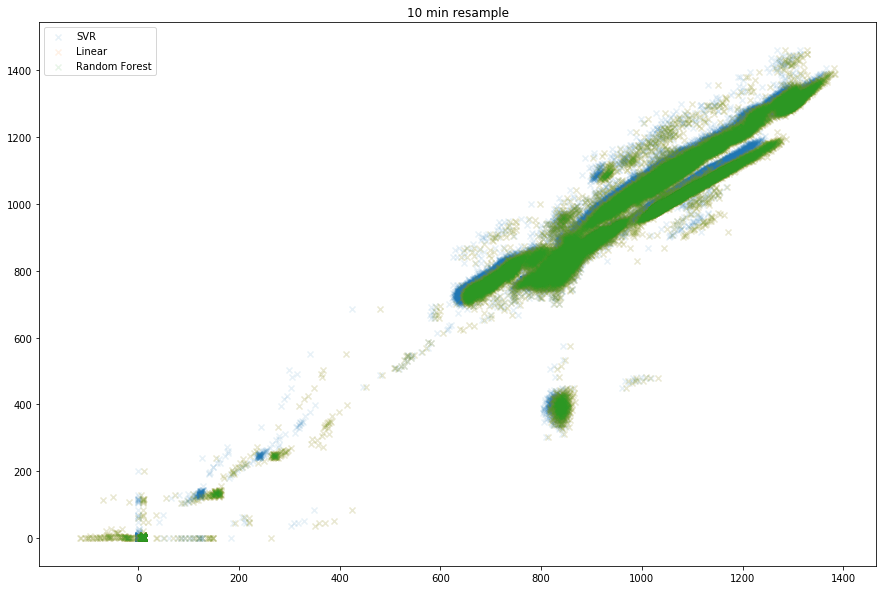

In [66]:
width = 15
height = 10
alpha_ = 0.1

fig, ax = plt.subplots()
fig.set_size_inches(width, height)

plt.scatter(m_svr.predict(X),y,alpha=alpha_,marker='x',label='SVR')
plt.scatter(m_linear.predict(X),y,alpha=alpha_,marker='x',label='Linear')
plt.scatter(m_linear.predict(X),y,alpha=alpha_,marker='x',label='Random Forest')

plt.title('10 min resample')
#ax.grid()
#ax.set(xlabel='Time', ylabel='FO Flow $m^3/h$')

plt.legend(loc='upper left')

plt.show()


In [70]:
from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)

In [72]:
from interpret import show
from interpret.perf import RegressionPerf

blackbox_perf = RegressionPerf(m_svr.predict).explain_perf(X_test, y_test, name='SVR model')
show(blackbox_perf)


In [73]:
from interpret.blackbox import MorrisSensitivity

sensitivity = MorrisSensitivity(predict_fn=m_svr.predict, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity SVR")

show(sensitivity_global)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



In [75]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=m_svr.predict, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global)

In [63]:
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

ebm = ExplainableBoostingRegressor(random_state=42,feature_names=test_features)
ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays

ExplainableBoostingRegressor(data_n_episodes=2000,
               early_stopping_run_length=50,
               early_stopping_tolerance=1e-05,
               feature_names=['Gps Speed (kn)', 'Power1 (kW)', 'Speed 1 (rpm)', 'SpeedlogSpeed (kn)', 'Torque 1 (kNm)'],
               feature_step_n_inner_bags=0,
               feature_types=['continuous', 'continuous', 'continuous', 'continuous', 'continuous'],
               holdout_size=0.15, holdout_split=0.15, interactions=0,
               learning_rate=0.01, max_tree_splits=2,
               min_cases_for_splits=2, n_estimators=16, n_jobs=-2,
               random_state=42, schema=None, scoring=None,
               training_step_episodes=1)

In [62]:
test_features

['Gps Speed (kn)',
 'Power1 (kW)',
 'Speed 1 (rpm)',
 'SpeedlogSpeed (kn)',
 'Torque 1 (kNm)']

In [64]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [58]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

In [59]:
from interpret import show
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)